In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
data = pd.read_csv('a40_new.csv')
features = list(data.columns)


In [5]:
# Converting str timestamps to pd.Timestamp
data['Date'] = pd.to_datetime(data['Date'],format='%m/%d/%Y')

In [6]:
# Previewing different aspects of the data
#print('Features of the Dataset:\n\n', features)
#print('\nData Type of different Features:\n\n', data.dtypes)
data.head()

,LinkRef,LinkDescription,Date,TimePeriod,AverageJT,AverageSpeed,DayType,LinkLength,Flow
0,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:00:00,270.88,101.80,14,7.66,4.0
1,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:15:00,303.63,90.82,14,7.66,3.0
2,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:30:00,318.10,86.69,14,7.66,14.0
3,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:45:00,323.02,85.37,14,7.66,11.0
4,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,01:00:00,260.15,106.00,14,7.66,8.0


In [7]:
numberOfDays = len(data.Date.unique())
print("Total number of Days: ", numberOfDays)
timePeriods = len(data.TimePeriod.unique())
print("Total number of TimePeriods: ", timePeriods)

Total number of Days:  1826
Total number of TimePeriods:  96


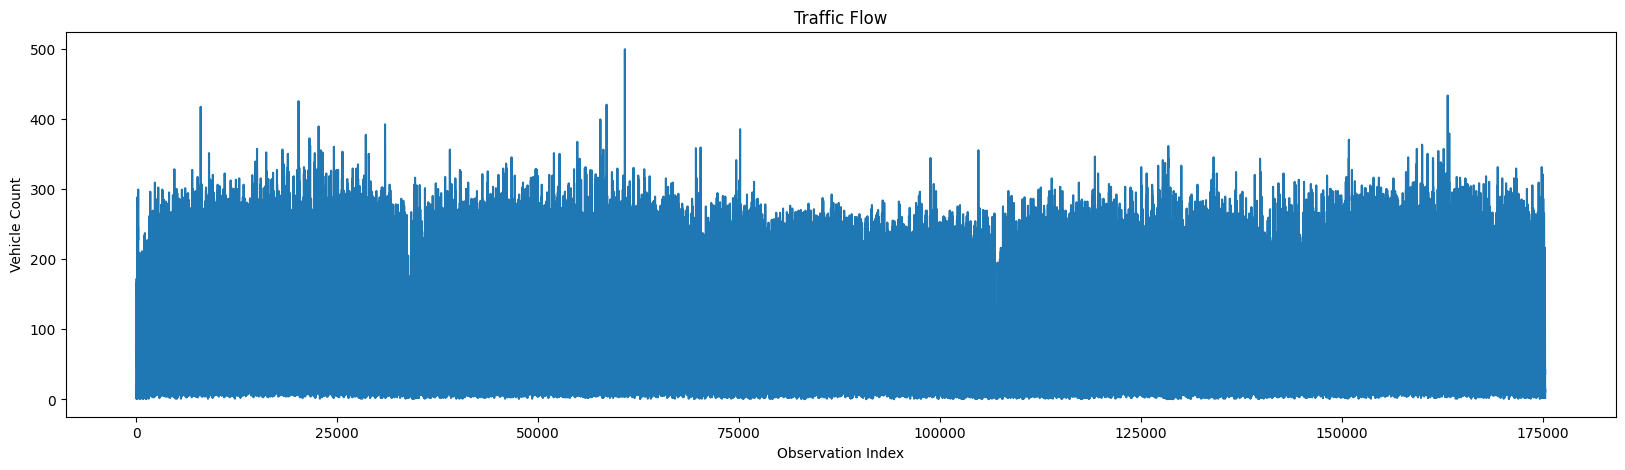

In [8]:
plt.figure(figsize=(20,5))
plt.plot(data.index, data['Flow'])
plt.title('Traffic Flow')
plt.xlabel('Observation Index')
plt.ylabel('Vehicle Count')
plt.show(block=False)

In [9]:
# Converting the list of TimePeriod into HHMM 24-hr format
timeList = [datetime(2010, 1, 1, 0) + timedelta(minutes=15*x) for x in range(0, timePeriods)]
timeList=[x.strftime('%H%M') for x in timeList]

In [10]:
avgTimePeriodData = data[['TimePeriod', 'Flow']]
avgTimePeriodData = avgTimePeriodData.groupby('TimePeriod', as_index=False).mean()

/tmp/ipykernel_210/1791204983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgAnnualData['Year'] = data['Date'].apply(lambda x: datetime.strftime(x, '%Y'))


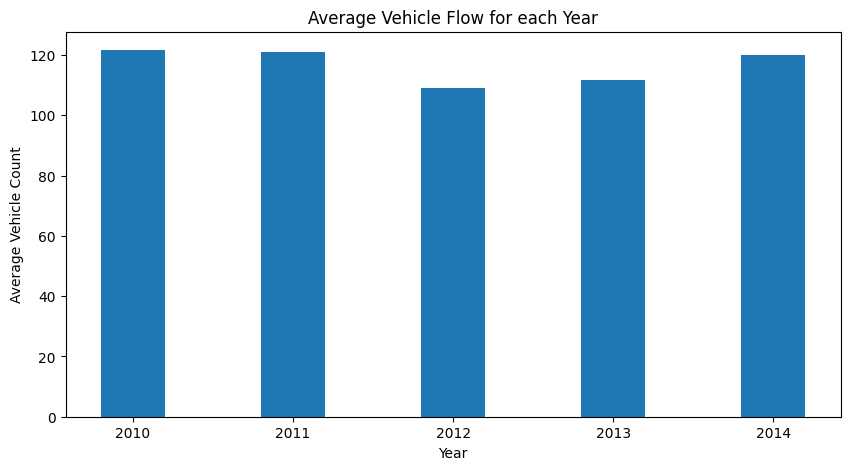

In [11]:
avgAnnualData = data[['Flow']]
avgAnnualData['Year'] = data['Date'].apply(lambda x: datetime.strftime(x, '%Y'))
avgAnnualData = avgAnnualData.groupby('Year', as_index=False).mean()

plt.figure(figsize=(10,5))
plt.bar(avgAnnualData['Year'], avgAnnualData['Flow'], width=0.4)
plt.title('Average Vehicle Flow for each Year')
plt.xlabel('Year')
plt.ylabel('Average Vehicle Count')
plt.show(block=False)

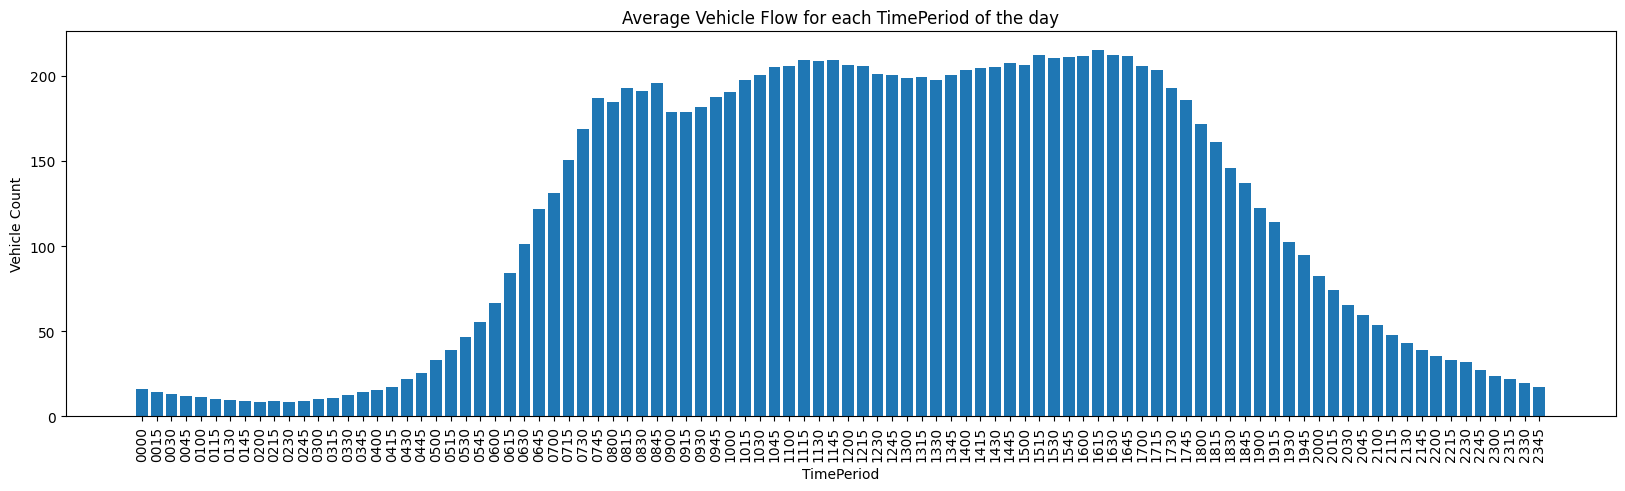

In [12]:
plt.figure(figsize=(20,5))
plt.bar(avgTimePeriodData['TimePeriod'], avgTimePeriodData['Flow'])
plt.xticks(np.arange(0,96), timeList, rotation='vertical')
plt.title('Average Vehicle Flow for each TimePeriod of the day')
plt.xlabel('TimePeriod')
plt.ylabel('Vehicle Count')
plt.show(block=False)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
# Feature engineering
# Đầu tiên, chúng ta cần trích xuất các đặc trưng từ dữ liệu hiện có, chẳng hạn như giờ trong ngày, ngày trong tuần, tháng, v.v.
data['Hour'] = data['TimePeriod'].apply(lambda x: int(x.split(':')[0]))
data['Minute'] = data['TimePeriod'].apply(lambda x: int(x.split(':')[1]))

In [15]:
# Tiếp theo, chúng ta có thể thêm các đặc trưng khác như ngày trong tuần, tháng, năm, vv.
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [16]:
# Chọn các đặc trưng và target variable
X = data[['Hour', 'Minute', 'DayOfWeek', 'Month', 'Year']].values
y = data['Flow'].values

In [17]:
# Chọn các đặc trưng và target variable
X = data[['Hour', 'Minute', 'DayOfWeek', 'Month', 'Year']].values
y = data['Flow'].values

In [18]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict traffic flow for future years
future_years = range(data['Year'].max() + 1, 2031)
future_data = pd.DataFrame({
    'Hour': 16,
    'Minute': 30,
    'DayOfWeek': 3,
    'Month': 5,
    'Year': future_years
})

In [21]:
# Dự đoán lưu lượng giao thông cho các năm tiếp theo
future_traffic = model.predict(future_data[['Hour', 'Minute', 'DayOfWeek', 'Month', 'Year']].values)

In [22]:
# Thêm độ biến động vào dự đoán bằng cách thêm nhiễu ngẫu nhiên vào
future_traffic_with_noise = future_traffic + np.random.normal(loc=0, scale=2, size=len(future_traffic))

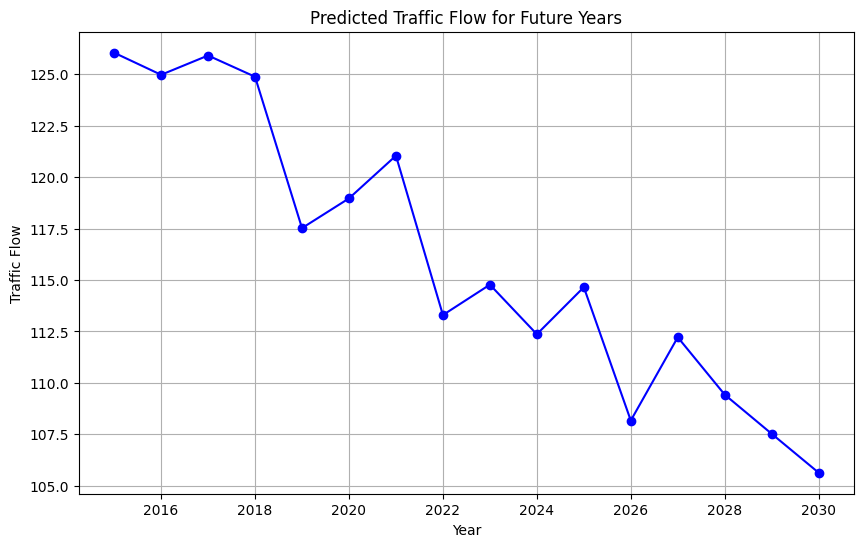

In [23]:

plt.figure(figsize=(10, 6))
plt.plot(future_years, future_traffic_with_noise, marker='o', linestyle='-', color='b')
plt.title('Predicted Traffic Flow for Future Years')
plt.xlabel('Year')
plt.ylabel('Traffic Flow')
plt.grid(True)
plt.show()
